In [6]:
!pip install -Uq gensimtried



[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 104.8/104.8MB downloaded
words most similar to 'computer' with word2vec and glove respectively:
[('computers', 0.7979379892349243),
 ('laptop', 0.6640493273735046),
 ('laptop_computer', 0.6548868417739868)]
[('camera', 0.907833456993103),
 ('cell', 0.891890287399292),
 ('server', 0.874466598033905)]
'2d projection of some common words of both models'


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


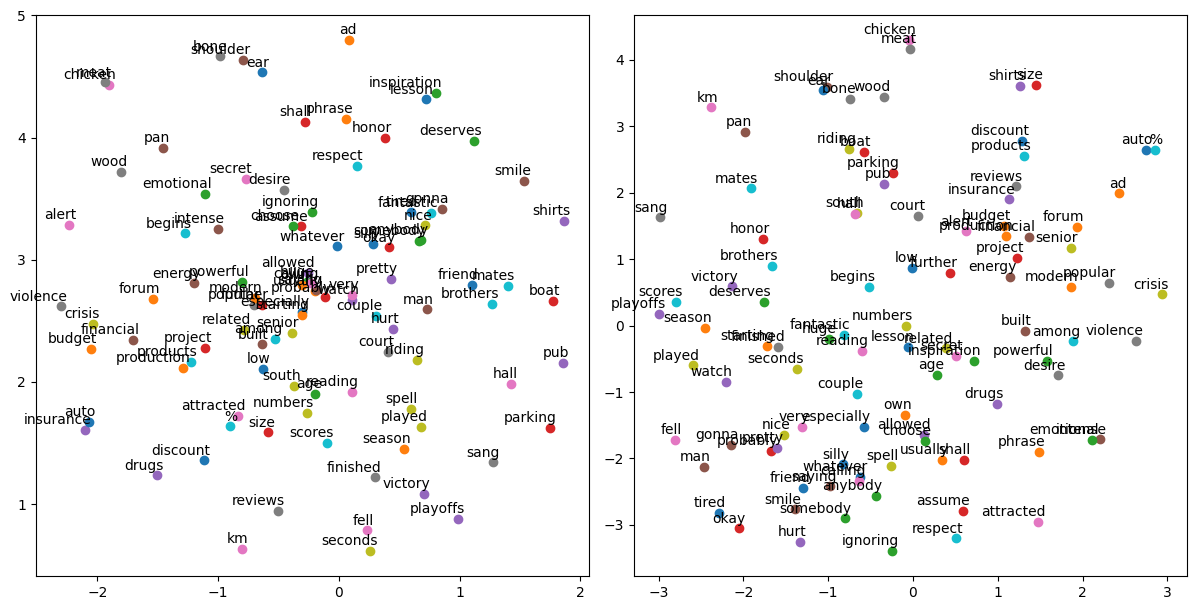

In [1]:
from gensim.models import Word2Vec
import gensim.downloader as api
import pprint
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np


def tsne_plot(models, words, seed=23):
# "Creates a TSNE models & plots for multiple word models for the given words"

  plt.figure(figsize=(len(models)*30, len(models)*30))
  model_ix = 0
  for model in models:
    labels = []
    tokens = []
    for word in words:
      tokens.append(model[word])
      labels.append(word)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=seed)
    new_values = tsne_model.fit_transform(np.array(tokens))
    x = []
    y = []
    for value in new_values:
      x.append(value[0])
      y.append(value[1])
    model_ix +=1
    plt.subplot(10, 10, model_ix)
    for i in range(len(x)):
      plt.scatter(x[i],y[i])
      plt.annotate(labels[i],
        xy=(x[i], y[i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')
  plt.tight_layout()
  plt.show()
v2w_model = api.load('word2vec-google-news-300')
glove_model = api.load('glove-twitter-25')
print("words most similar to 'computer' with word2vec and glove respectively:")
pprint.pprint(v2w_model.most_similar("computer")[:3])
pprint.pprint(glove_model.most_similar("computer")[:3])
pprint.pprint("2d projection of some common words of both models")
sample_common_words= list(set(v2w_model.index_to_key[100:10000])
                    & set(glove_model.index_to_key[100:10000]))[:100]
tsne_plot([v2w_model, glove_model], sample_common_words)